# Implementar hooks

En este momento ya sabemos como crear una plantilla personalizada para nuestros proyectos.

Pero en esta clase vamos a profundizar un poco mas en una herramienta que nos permitirá avanzar mas con el programa **cookicutter**. Esta herramienta son los **HOOKS**

### HOOKS

Son cosas que se van a ejecutar antes o después de generar la plantilla de datos.

Imaginemos que el `project_slug` en una ocasión sea el nombre de un paquete, así que necesitamos verificar que el nombre de este sea una expresión valida.

O por ejemplo podemos hacer que git se ejecute después de haber creado la plantilla o el proyecto, con esto evitamos realizar las cosas repetitivas.

Vamos a aprender como se usan los **Hooks**

Vamos a modificar el archivo [cookiecutter.json](cookiecutter-personal/cookiecutter.json). Así modificamos la segunda linea:

```json
"project_slug": "{{ cookiecutter.project_title.lower().replace(' ','_').replace('-','_') }}",
```

Es importante saber que los hooks son acciones que se van a ejecutar antes o después de crear el proyecto, por ende son archivos de configuración y van afuera de la carpeta `project_slug`.

Así que creamos una carpeta especial para ellos, llamada "**hooks**"


Es importante saber que los hooks pueden ejecutarse con archivos de tipo **python (.py)** o con tipo **bash (.sh)**.

Creamos 2 archivos diferentes con python debido a su facilidad de implementación.
1. [pre_gen_project.py](cookiecutter-personal/hooks/pre_gen_project.py)
2. [post_gen_project.py](cookiecutter-personal/hooks/post_gen_project.py)

Así cuando **cookiecutter** haga la plantilla, buscará el contenido de esta plantilla y procederá a leer los archivos, para poder realizar ciertas acciones antes y después de crear la plantilla. Podemos hacer cosas simples, hasta algo mucho mas complejo.

Modifiquemos los archivos:
### [pre_gen_project.py](cookiecutter-personal/hooks/pre_gen_project.py)

```py
import subprocess

MESSAGE_COLOR = "\x1b[34m"
RESET_ALL = "\x1b[0m"

print(f"{MESSAGE_COLOR}Almost done!")
print(f"Initializing a git repository...{RESET_ALL}")

#inicializar repositorio
subprocess.call(['git', 'init'])
#anadir los archivos al stage
subprocess.call(['git', 'add', '*'])
#Hacer el primer commit
subprocess.call(['git', 'commit', '-m', 'Initial commit'])

print(f"{MESSAGE_COLOR}The beginning of your destiny is defined now! Create and have fun!{RESET_ALL}")
```

Así podemos crear una lógica que me ayude a crear un automatización en mi creación de plantillas.

Vamos a ejecutar para crear la plantilla y ver los resultados, recordemos estar en `/cookiecutter-personal`. Se tiene que ver así;

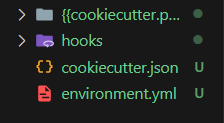

Ahora procedemos a presionar `Ctrl + Shift + P` seleccionamos `Create a New Terminal` y ejecutamos lo siguiente

```bash
#activar el entorno donde tenemos cookicutter
conda activate cookiecutter
#ejecutar cookiecutter
cookiecutter .
```

Procedemos a rellenar todos los campos y me debe generar algo como lo siguiente:

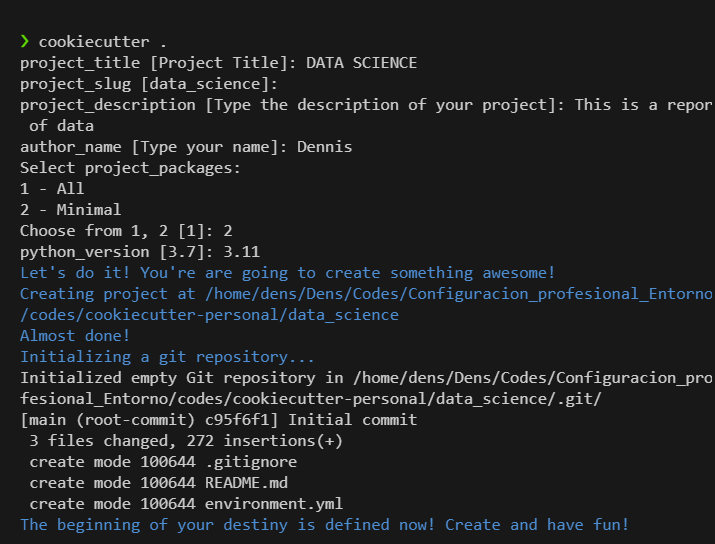

Ademas me creo una carpeta con todos los parámetros del proyecto que ingrese.

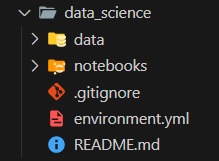

Esto es todo, hemos aprendido como implementar hooks para que se ejecuten antes y después de generar mi plantilla.
Podríamos expandir nuestra implementación al realizar comprobaciones mas complejas.